<div style="background-color:lightgray; color:black; padding:10px; border-radius:5px;">
  <h1>Sprint 5</h1>
</div>

## Tarea 5: Análisis Exploratorio de los Datos (EDA)

## 🎯 **Objetivo:**
Realizar un Análisis Exploratorio de los Datos (**EDA**) en **Python**.

---

### **Ejercicio 1**. Análisis Exploratorio de los Datos (**EDA**).

**"Descripción del EDA para el Proyecto de Perfilado Inteligente de Clientes"**

**Objetivo**
El objetivo del análisis exploratorio de datos (EDA) en este proyecto es examinar y documentar las características clave del conjunto de datos de clientes bancarios para identificar patrones, relaciones y variables importantes que contribuyan a la suscripción de depósitos a plazo fijo. Este EDA permitirá obtener una comprensión profunda de los datos y su estructura, sirviendo de base para los modelos de segmentación y predicción que maximicen la efectividad de las campañas de marketing del banco.

**Metodología del EDA**
- **Estadísticas Descriptivas Básicas:** Revisaremos las estadísticas generales para todas las variables numéricas y categóricas, lo que nos permitirá observar distribuciones, valores promedio, rangos y otras características.

- **Detección y Gestión de Valores Faltantes:** Identificaremos y manejaremos los valores faltantes en el conjunto de datos, lo que es crucial para evitar sesgos en el análisis y en el modelado posterior.

- **Detección y Gestión de Outliers:** Detectaremos valores atípicos en las variables relevantes que puedan afectar la precisión del modelo. La gestión de estos valores atípicos puede involucrar su eliminación o transformación.

- **Identificación de Características Relevantes:** Evaluaremos la relación entre las variables independientes y la variable objetivo para identificar aquellas características que podrían influir en la suscripción a depósitos.

- **Detección del Desbalance de Clases:** Revisaremos el balance entre las clases para asegurar que el modelo final sea preciso. Si detectamos desbalance, se recomendaran  técnicas de re-muestreo para balancear las clases.

- **Conclusión:** Resumiremos los hallazgos clave, explicando las características que aportan al perfil de suscripción de depósitos y señalando los pasos necesarios para el preprocesamiento y modelado de los datos.

## 1. Importar Librerías

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import plotly.express as px
import joypy
from joypy import joyplot
import missingno as msno


#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, chi2_contingency, f_oneway, kruskal

# 2. Carga el dataset

In [2]:
bank_data= pd.read_csv('/home/ngonzalez/mi_pagina_personal/bank_dataset.CSV')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# 3. Informació general del dataset

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


El método data.info() nos proporciona un resumen general del conjunto de datos:

- Total de entradas: 11,162 registros con 17 columnas.
Tipos de datos:
- Variables numéricas (de tipo float64 y int64): como age, balance, day, duration, campaign, pdays, previous.
- Variables categóricas (object): job, marital, education, default, housing, loan, contact, month, poutcome, y deposit.
- Valores faltantes:age, marital, y education tienen algunos valores faltantes, ya manejados previamente en el análisis.

Este resumen nos confirma que las variables están bien definidas para el análisis exploratorio y el modelado posterior, permitiendo un análisis demográfico, financiero y de interacción de los clientes en relación con la suscripción de depósitos.

# 4. Descripción estadística y visualización global de las variables.

## 4.1 Descripción estadística

In [5]:
# Estadísticas para variables numéricas
numeric_stats = bank_data.describe()
numeric_stats

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Observaciones para Variables Numéricas**
- **age:**
La media de edad es aproximadamente 41 años, con un rango que va de 18 a 95 años. Esto indica que el banco tiene clientes de una amplia variedad de edades, lo que sugiere segmentos demográficos diversos.
- **balance:**
El saldo promedio anual de los clientes es alrededor de 1528, pero el rango es amplio, desde un saldo negativo de -6847 hasta un máximo de 81204. Esto revela la posible existencia de outliers, y sugiere una variabilidad significativa en el perfil económico de los clientes.
- **duration:**
La duración promedio de las llamadas es de unos 372 segundos, con un máximo de 3881 segundos. Como la duración de las llamadas es una variable clave en la conversión de suscripción, estos valores sugieren una alta variabilidad en las interacciones con los clientes.
- **campaign y previous:**
La mediana de campaign es 2, lo que indica que la mayoría de los clientes fueron contactados al menos dos veces en la campaña actual. Por otro lado, previous (número de contactos previos) tiene una mediana de 0, lo que sugiere que muchos clientes no participaron en campañas anteriores.

In [6]:
# Estadísticas para variables categóricas
categorical_stats = bank_data.describe(include=['object'])
categorical_stats 

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11157,11155,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6349,5474,10994,5881,9702,8042,2824,8326,5873


**Observaciones para Variables Categóricas**
- **job:**
Hay 12 tipos de ocupación distintos, con "management" como la ocupación más frecuente. Esto podría indicar un enfoque del banco en clientes que ocupan puestos de alto perfil, lo que puede influir en su propensión a invertir en productos financieros como los depósitos a plazo.

- **marital:**
Las categorías maritales principales son "married", "single", y "divorced", con la mayoría de los clientes en la categoría "married". Este factor podría relacionarse con la estabilidad financiera y, potencialmente, la disposición a realizar inversiones.

- **education:**
La educación se clasifica en cuatro niveles, siendo "secondary" el más frecuente. Este nivel educativo podría correlacionarse con ciertas decisiones financieras y actitudes hacia la inversión.

- **poutcome (resultado de la campaña previa):**
La categoría más común es "unknown", seguida de "failure", lo que indica que una gran cantidad de clientes no tiene un historial previo de respuesta positiva a campañas. Esto podría implicar desafíos adicionales en la efectividad de campañas actuales para nuevos depósitos.

Este análisis inicial de las estadísticas descriptivas proporciona una base sólida para entender el perfil de clientes y sus patrones de comportamiento financiero. La variabilidad observada en variables como balance y duration, junto con las características demográficas y de interacción, sugiere que existen segmentos específicos de clientes con diferentes niveles de propensión a suscribir un depósito. Estos hallazgos guiarán las siguientes etapas del análisis, incluyendo la identificación de características relevantes y la segmentación de clientes para maximizar la efectividad de las estrategias de marketing del banco.

## 4.2 Análisis Univariable Numéricas

In [7]:
# Seleccionar solo las variables continuas del conjunto de datos bancario
cont_data = bank_data.select_dtypes(include=['float64', 'int64']).copy()

# Verificar las columnas seleccionadas
cont_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       11152 non-null  float64
 1   balance   11162 non-null  int64  
 2   day       11162 non-null  int64  
 3   duration  11162 non-null  int64  
 4   campaign  11162 non-null  int64  
 5   pdays     11162 non-null  int64  
 6   previous  11162 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 610.5 KB


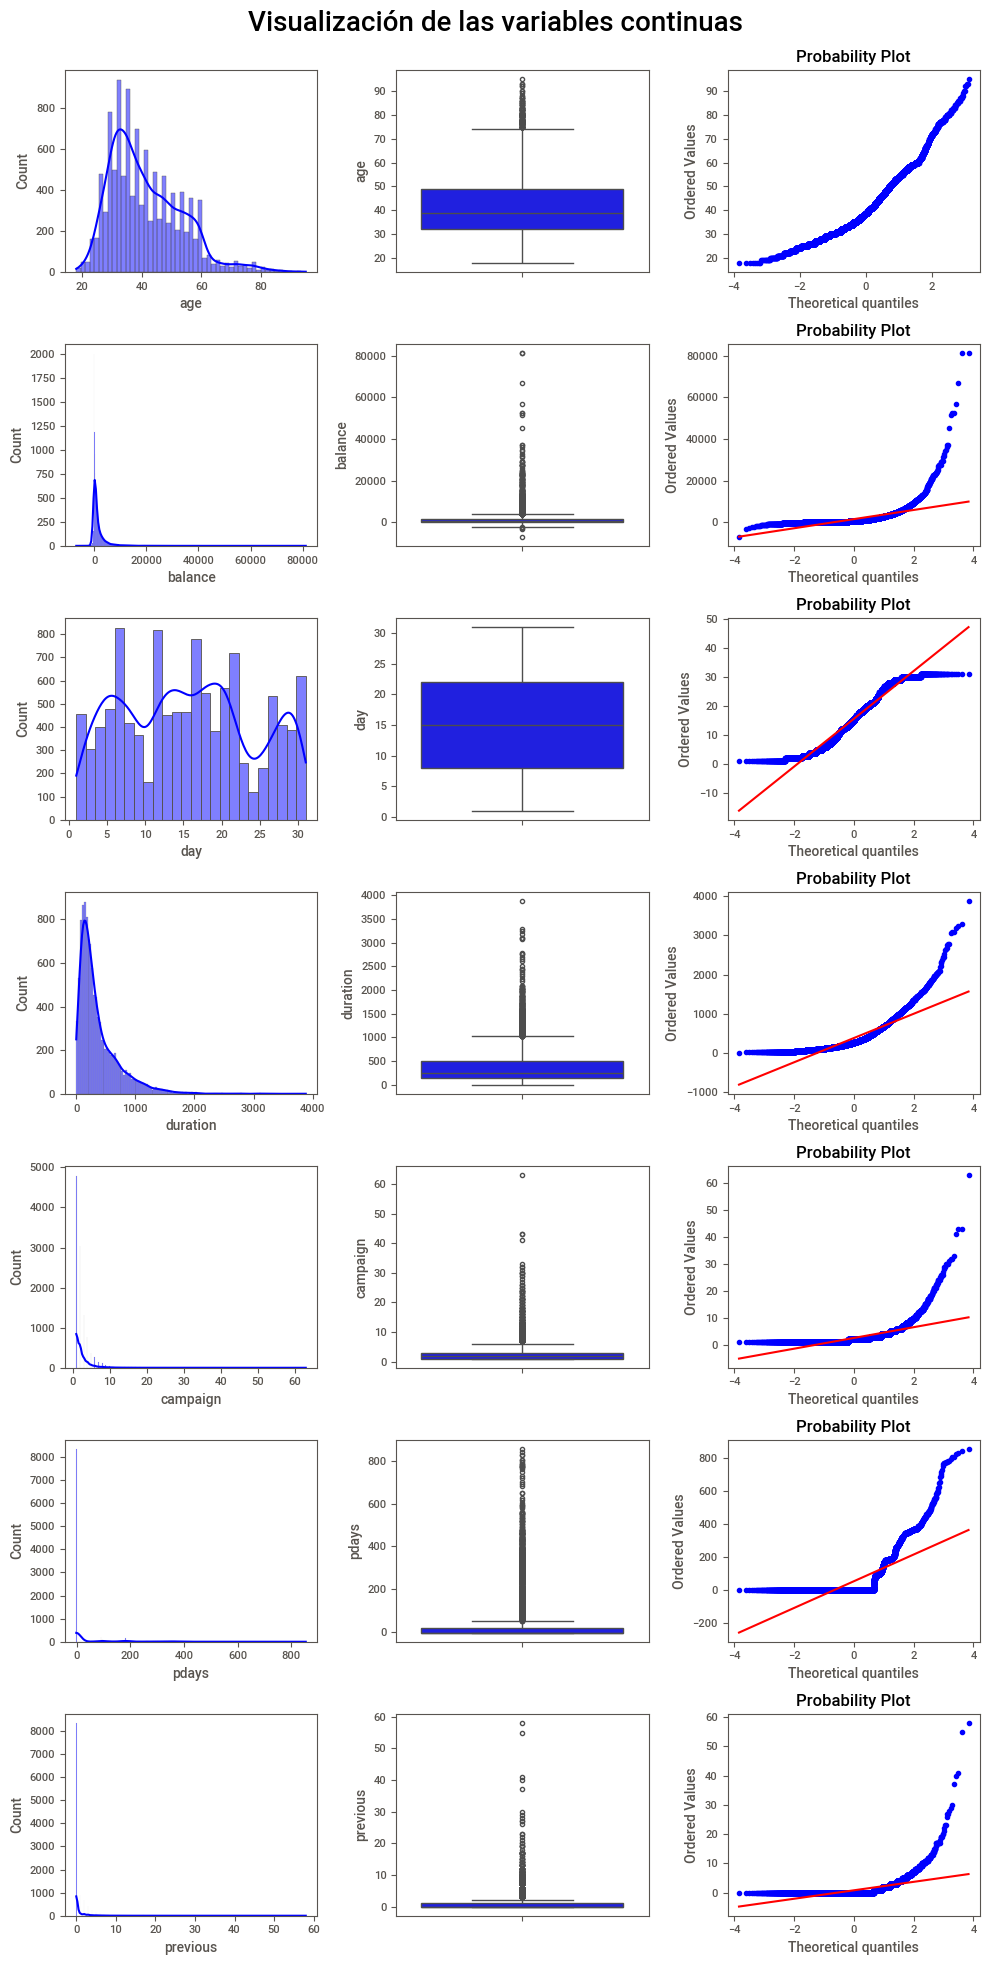

In [13]:
fig, ax = plt.subplots(7, 3, figsize=(10, 20))
for index, i in enumerate(cont_data.columns):
    sns.histplot(cont_data[i], ax=ax[index, 0], color='blue', kde=True)
    sns.boxplot(cont_data[i], ax=ax[index, 1], color='blue')
    stats.probplot(cont_data[i], plot=ax[index, 2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualización de las variables continuas", fontsize=20)
plt.show()

**Observaciones para Variables Numéricas**

**age:**
La distribución de la edad es asimétrica a la derecha, con la mayoría de los clientes entre 20 y 60 años.
Hay algunos outliers en los extremos de edad (clientes muy jóvenes y muy mayores), aunque podrían ser clientes válidos.
El Q-Q plot muestra una desviación de la normalidad, indicando que esta variable podría no estar normalmente distribuida.

**balance:**
La variable balance presenta una gran cantidad de outliers con valores altos, sugiriendo clientes con saldos significativamente más elevados que el promedio.
La mayoría de los clientes tienen balances relativamente bajos, lo cual podría ser importante para segmentar a los clientes en términos de poder adquisitivo.
En el Q-Q plot, los valores más altos están alejados de la línea de normalidad, confirmando una distribución con colas largas a la derecha.

**duration:**
La duración de las llamadas tiene una distribución asimétrica hacia la derecha, con algunos valores muy elevados (outliers).
La mayoría de las llamadas son de corta duración, lo cual podría indicar que los contactos suelen ser breves en general. No obstante, las llamadas más largas podrían asociarse con una mayor probabilidad de conversión.
El Q-Q plot muestra una desviación considerable de la normalidad en los valores altos.

**campaign y previous:**
Tanto campaign (número de contactos en la campaña actual) como previous (número de contactos en campañas anteriores) muestran distribuciones asimétricas, con un alto número de clientes que fueron contactados solo una vez.
Estos gráficos sugieren que el banco no realiza demasiados contactos repetidos para la mayoría de los clientes, lo que podría implicar que las campañas son relativamente eficientes o que muchos clientes pierden interés después de los primeros contactos.

**pdays:**
La variable pdays (días desde el último contacto) muestra una gran cantidad de valores de -1, lo cual representa la ausencia de contacto previo. Esto indica que muchos clientes no participaron en campañas previas.
Para aquellos que sí fueron contactados, existe una alta concentración de valores bajos, lo que sugiere que las campañas recientes podrían haber tenido un mayor impacto.

**Observaciones Generales**

Como se observa en los histogramas, probabilidad (Q-Q plots) y cajas (BoxPlots), varias de las variables no siguen una distribución normal. En los histogramas, algunas variables presentan sesgos hacia la derecha o izquierda, lo cual sugiere una diferencia entre la media y la mediana, tal como se observó en el análisis estadístico previo. Esto indica que la mayoría de estas variables no tienen una distribución simétrica, lo que es importante al momento de aplicar técnicas estadísticas y de modelado.

En los gráficos de probabilidad (Q-Q plots), algunos registros no siguen la línea de referencia, especialmente en los extremos y, en algunos casos, en el centro. Esta desviación de la línea recta indica que estas variables no distribuyen normalmente. Para validar esta observación, se aplicará una prueba de hipótesis para evaluar la normalidad.

### 4.2.1 Aplicación de Pruebas de Hipótesis para Normalidad

Para verificar si las variables siguen una distribución normal, se aplicará la prueba de Shapiro-Wilk con las siguientes hipótesis:

- H₀: Los datos están distribuidos normalmente.
- H₁: Los datos no están distribuidos normalmente.

Esta prueba de hipótesis permitirá identificar si alguna de las variables requiere transformaciones adicionales, ya que los gráficos sugieren que la mayoría de las variables no tienen una distribución normal, lo cual afecta la aplicación de ciertos modelos y estadísticas.

In [21]:
def check_normal_distribution(data):
    for i in data.columns:
        shapiro_test = stats.shapiro(data[i])
        print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
        if shapiro_test.pvalue>0.05:
            print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
            print('----------------------------------------------------------------------------------------------')
        else:
            print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')
            print('----------------------------------------------------------------------------------------------')

In [23]:
check_normal_distribution(cont_data)

La variable age tiene un p-value=  nan
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable balance tiene un p-value=  2.9431713640543387e-102
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable day tiene un p-value=  4.470374855656178e-48
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable duration tiene un p-value=  5.844677392330821e-79
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

--------------------------------------------------------------------------

/home/ngonzalez/mi_pagina_personal/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11162.
  res = hypotest_fun_out(*samples, **kwds)


En todos los casos, se rechaza la hipótesis nula de normalidad. Esto significa que ninguna de las variables numéricas sigue una distribución normal, lo cual respalda las observaciones realizadas en el análisis gráfico. Este resultado sugiere que, para estas variables, será necesario considerar transformaciones o técnicas de análisis no paramétricas, ya que las distribuciones no gaussianas podrían afectar el desempeño de los modelos y el análisis estadístico.

### 4.2.2 Verificar Asimetrias

In [24]:
cont_data.agg(['skew','kurtosis']).T

,skew,kurtosis
age,0.862827,0.621101
balance,8.224619,126.861303
day,0.111330,-1.061324
duration,2.143695,7.301282
campaign,5.545578,57.389771
pdays,2.449986,6.838359
previous,7.335298,106.197826


Las variables balance, duration, campaign, pdays, y previous presentan asimetrías y curtosis muy elevadas, lo cual indica distribuciones sesgadas con valores extremos. Esto sugiere la necesidad de:

- Transformaciones logarítmicas o transformaciones de raíz cuadrada para reducir la asimetría y minimizar el impacto de los outliers.
- Tratamiento de outliers en variables con alta curtosis (como balance y previous), dado que los valores extremos pueden afectar el rendimiento y precisión del modelo.

Este análisis refuerza la necesidad de ajustes en estas variables para mejorar la calidad del modelo y reducir el impacto de los outliers en el análisis.

## 4.3 Análisis Univariable Categóricas

In [14]:
cat_data = bank_data.select_dtypes(include=['object']).copy()
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        11162 non-null  object
 1   marital    11157 non-null  object
 2   education  11155 non-null  object
 3   default    11162 non-null  object
 4   housing    11162 non-null  object
 5   loan       11162 non-null  object
 6   contact    11162 non-null  object
 7   month      11162 non-null  object
 8   poutcome   11162 non-null  object
 9   deposit    11162 non-null  object
dtypes: object(10)
memory usage: 872.2+ KB


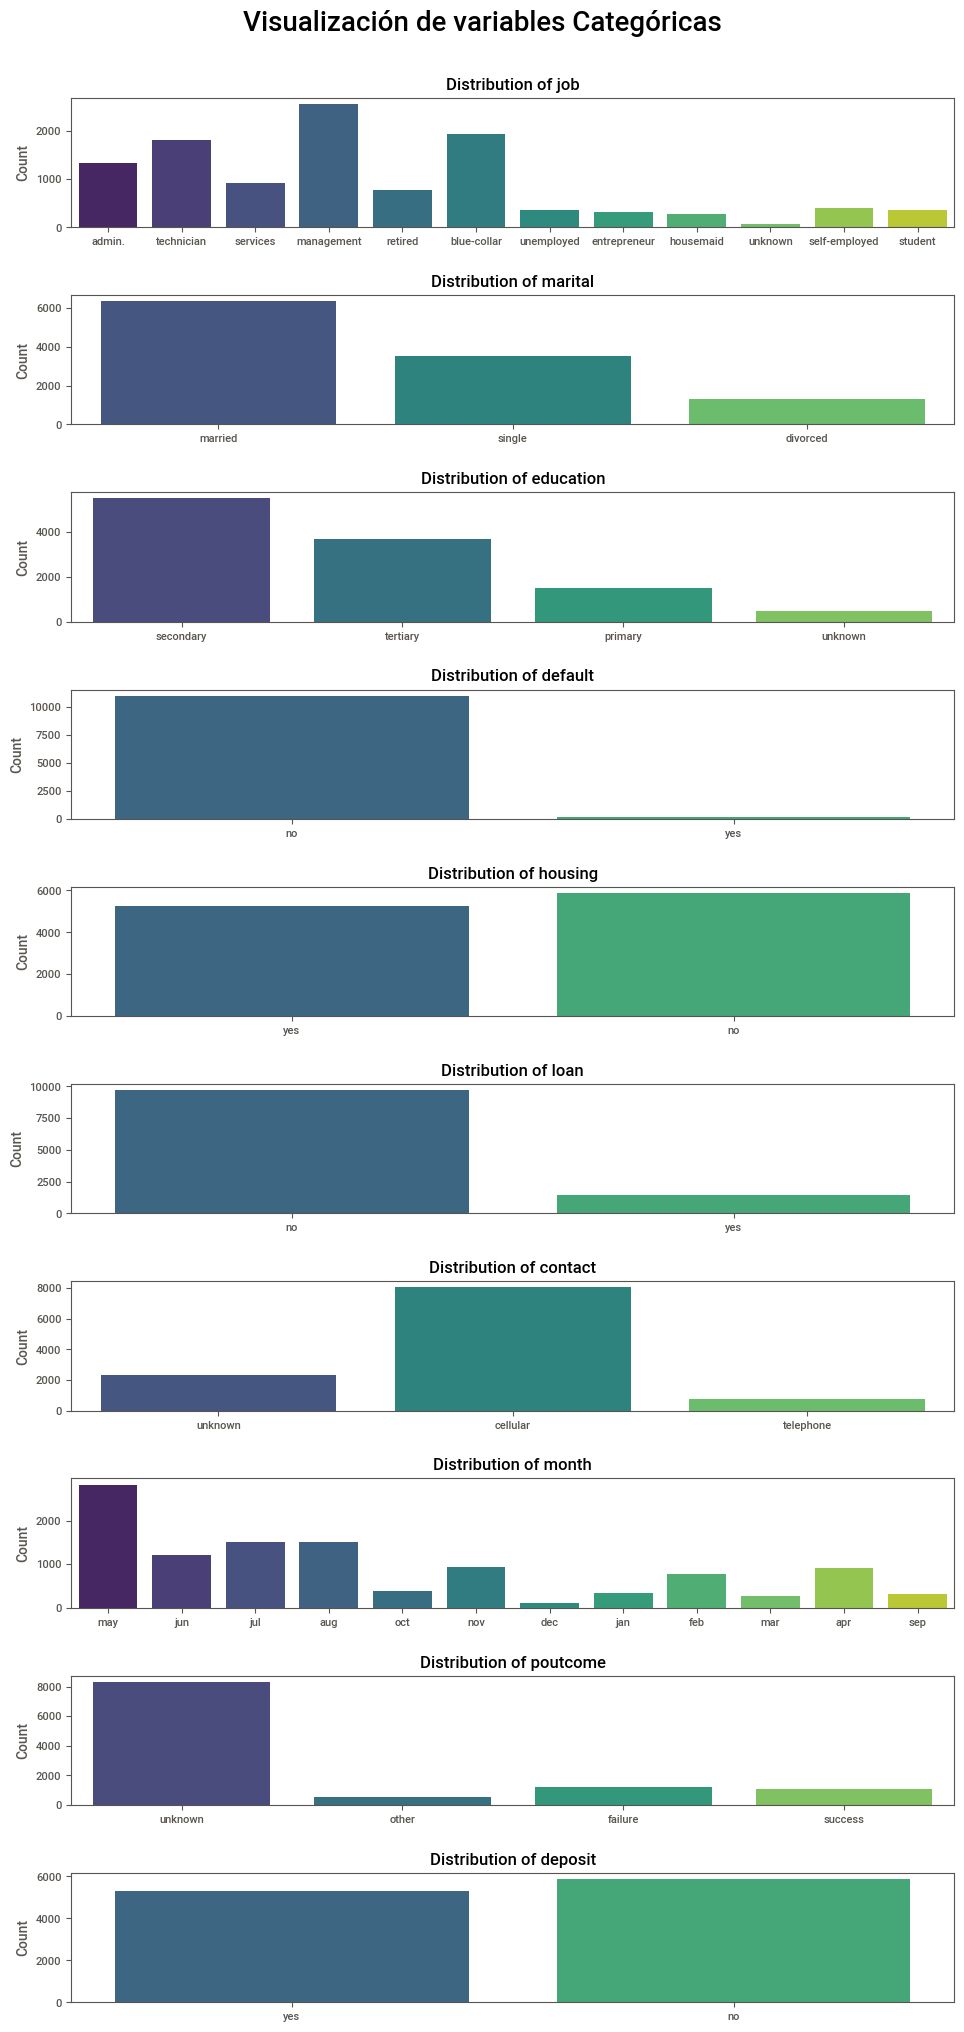

In [16]:
# Visualización de variables categóricas
fig, ax = plt.subplots(len(cat_data.columns), 1, figsize=(10, 20))  # Ajusta el tamaño de la figura aquí

for index, col in enumerate(cat_data.columns):
    sns.countplot(data=cat_data, x=col, hue=col, ax=ax[index], palette="viridis", legend=False)
    ax[index].set_title(f"Distribution of {col}", fontsize=12)  # Ajusta el tamaño del título
    ax[index].set_xlabel("")
    ax[index].set_ylabel("Count")

fig.tight_layout(pad=2.0)  # Ajusta el espaciado entre los subplots
plt.suptitle("Visualización de variables Categóricas", fontsize=20, y=1.02)  # Ajusta el tamaño del título principal
plt.show()

**Observaciones para Variables Categóricas**

**job:**
La mayoría de los clientes pertenecen a ocupaciones como "management" y "blue-collar", lo que indica una representación significativa de clientes en roles gerenciales y de trabajos manuales.
Las categorías menos representadas son "student" y "housemaid", lo que podría indicar una baja participación de estudiantes y personal doméstico en las ofertas de depósitos.

**marital:**
La mayoría de los clientes están casados ("married"), seguido de aquellos que están solteros ("single"). Este balance puede influir en la disposición a adquirir productos financieros.

**education:**
La mayoría de los clientes tiene un nivel educativo "secondary", seguido de "tertiary". El nivel educativo podría ser un factor importante en la segmentación, ya que puede afectar el comportamiento financiero y la propensión a suscribir depósitos.

**default, housing, y loan:**
La mayoría de los clientes no tienen impagos previos (default = "no"), lo cual podría reflejar un perfil financiero relativamente seguro.
La variable housing muestra que la mayoría tiene préstamos de vivienda, lo que podría indicar un compromiso financiero adicional que afecte la decisión de invertir en depósitos.
En loan, la mayoría no tiene préstamos personales, lo cual podría sugerir menor carga de deuda y mayor capacidad para ahorrar o invertir.

**contact:**
La mayoría de los contactos se realizan a través de teléfono celular (cellular). Este dato es relevante para ajustar la estrategia de contacto, ya que podría ser el canal preferido por los clientes.

**month:**
La mayoría de los contactos se realizaron en mayo. Esta información puede ser útil para ajustar la temporalidad de las campañas y maximizar el impacto en meses específicos.

**poutcome (resultado de la campaña anterior):**
La mayoría de los valores en poutcome son "unknown", indicando que muchos clientes no participaron en campañas previas o no hubo un registro de los resultados. Esto puede representar un reto, ya que limita el conocimiento previo sobre la efectividad de la campaña en estos clientes.

**deposit:**
La variable deposit (suscripción a depósitos) está distribuida de forma relativamente equilibrada entre "yes" y "no". Esto es favorable para el modelado, ya que no se observa un desbalance fuerte en la variable objetivo.

# 5. Valores nulos y outliers

## 5.1 Valores Nulos y NaM

In [17]:
bank_data.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [18]:
bank_data.isna().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

<Axes: >

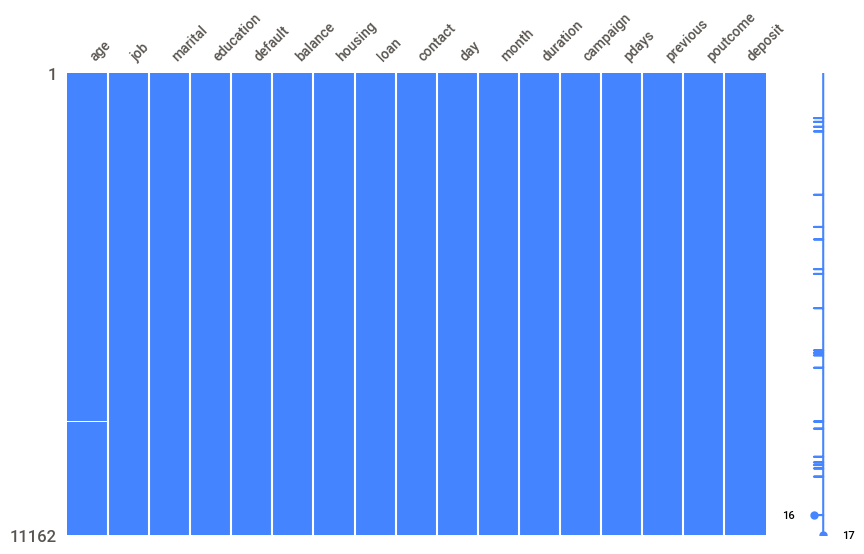

In [19]:
# show missing values and how they are distributed in the dataset. 
msno.matrix(bank_data, color=(0.27, 0.52, 1.0), figsize=(10,6),fontsize=(10))

**Observaciones sobre Valores Faltantes**

**Variables con valores nulos:**
Las columnas age, marital, y education presentan valores nulos. Específicamente:
- age tiene 10 valores faltantes.
- marital tiene 5 valores faltantes.
- education tiene 7 valores faltantes.
- Todas las demás columnas están completas, sin valores nulos.

**Visualización de Valores Nulos:**
En el gráfico, vemos que los valores faltantes están distribuidos en muy pocas filas del conjunto de datos, lo que indica que representan un pequeño porcentaje en relación al total (11,162 registros). Esto sugiere que la imputación o eliminación de estos valores no debería afectar significativamente el análisis.

**Propuesta de Imputación para Valores Faltantes**
- age (variable numérica): Imputar los valores faltantes con la mediana de la columna age. Dado que la edad puede tener outliers y una distribución sesgada, la mediana es una opción más robusta que la media y evitará que los valores extremos influyan en la imputación.

- marital (variable categórica): Imputar los valores faltantes con la moda (valor más frecuente) de la columna marital. Dado que el estado civil es una variable categórica, la moda es una opción apropiada para representar la categoría predominante en la población.

- education (variable categórica): Imputar los valores faltantes con la moda de la columna education. Similar a marital, el nivel educativo es una variable categórica, y la moda es una opción adecuada para mantener la coherencia en la distribución de la variable.

## 5.2 OUTLIERS

En los gráficos de cajas (BoxPlots), se identifican outliers significativos en varias variables, lo cual puede impactar en el análisis y los resultados del modelo. Observamos lo siguiente:

**Balance:** Presenta numerosos outliers en los valores altos, lo cual sugiere la presencia de clientes con saldos excepcionalmente elevados.

**Duration:** También muestra outliers en las llamadas más largas, lo cual podría estar relacionado con una mayor probabilidad de conversión en la campaña.

**Pdays:** La mayoría de los valores están en -1, indicando que estos clientes no fueron contactados previamente, pero existen valores elevados para aquellos que sí fueron contactados en campañas anteriores. Estos valores extremos pueden no ser representativos de la efectividad actual de la campaña y podrían ser tratados para reducir su impacto.   

En este sentido se determinaran los outtilers o valores atípicos en las variables numéricas.

In [20]:
#% of outliers
for k, v in cont_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(cont_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))  

Column age outliers = 1.53%
Column balance outliers = 9.46%
Column day outliers = 0.00%
Column duration outliers = 5.71%
Column campaign outliers = 7.76%
Column pdays outliers = 24.64%
Column previous outliers = 11.27%


Con base en los resultados del análisis de outliers, observamos lo siguiente:

- age: Tiene un 1.53% de outliers, lo cual es relativamente bajo. Estos valores extremos pueden representar a clientes muy jóvenes o muy mayores. Aunque la proporción es pequeña, podrían mantenerse si representan casos válidos.

- balance: Presenta un 9.46% de outliers, lo que es significativo. Esto indica la existencia de clientes con saldos muy altos que se alejan del promedio. Dado que el balance es una variable económica, estos valores podrían tener un impacto considerable en el análisis.

- day: No tiene outliers (0.00%), lo que indica que los contactos en diferentes días están bien distribuidos y dentro de un rango común. No se requiere gestión de outliers para esta variable.

- duration: Tiene un 5.71% de outliers, representando llamadas que fueron significativamente más largas. Estos valores pueden ser importantes, ya que una llamada larga podría estar relacionada con una mayor probabilidad de conversión. Sin embargo, podrían considerarse transformaciones para reducir su impacto.

- campaign: Presenta un 7.76% de outliers, lo que representa clientes que fueron contactados muchas veces. Estos valores pueden sesgar el análisis, ya que los contactos repetidos pueden afectar la percepción del cliente sobre la campaña.

- pdays: Tiene un 24.64% de outliers, lo cual es bastante alto. Esto se debe a la gran cantidad de valores en -1 (sin contacto previo) y otros valores altos que representan contactos en campañas anteriores. Los valores altos pueden no ser tan relevantes para la campaña actual, por lo que deben ser manejados.

- previous:Con un 11.27% de outliers, representa clientes con múltiples contactos previos, lo cual es relativamente común en campañas de marketing. Sin embargo, los valores extremos podrían impactar el modelo.

Para manejar estos outliers de manera efectiva, se propone las siguientes estrategias en la fase de pre-procesamiento de datos:

- Transformación de Variables (Log o Raíz Cuadrada):
Para las variables con alta asimetría y curtosis como balance, duration, campaign, y pdays, una transformación logarítmica o de raíz cuadrada podría ayudar a reducir el efecto de los outliers y normalizar un poco la distribución.

- Winsorización:
Para variables como balance y previous, donde los valores extremos son significativos, la winsorización (limitando los valores en los percentiles 5 y 95) podría reducir el impacto de los outliers sin eliminar demasiados datos.

- Imputación o Agrupación de pdays:
Para pdays, dado que la mayoría de los valores son -1, podríamos agrupar en categorías: sin contacto previo, contacto reciente y contacto lejano. Esto simplificaría la variable y reduciría el efecto de los outliers en los valores altos.

- Mantener Valores Extremos con Análisis Adicional:
En variables como duration y campaign, los valores altos pueden aportar información valiosa (por ejemplo, una mayor duración de llamada podría indicar mayor interés del cliente). Estos outliers podrían mantenerse, pero se deben evaluar cuidadosamente en el modelo final para evitar sesgos.

Esta estrategia combinada permitirá reducir el efecto de los outliers y asimetrías en el análisis, mejorando la precisión y estabilidad del modelo final.

# 6. Identificación de Características Relevantes:

Para identificar las características relevantes que podrían influir en la suscripción a depósitos, debemos analizar la relación entre cada una de las variables independientes y la variable objetivo (deposit). 

## 6.1  Calcular la Matriz de Correlación para Variables Numéricas

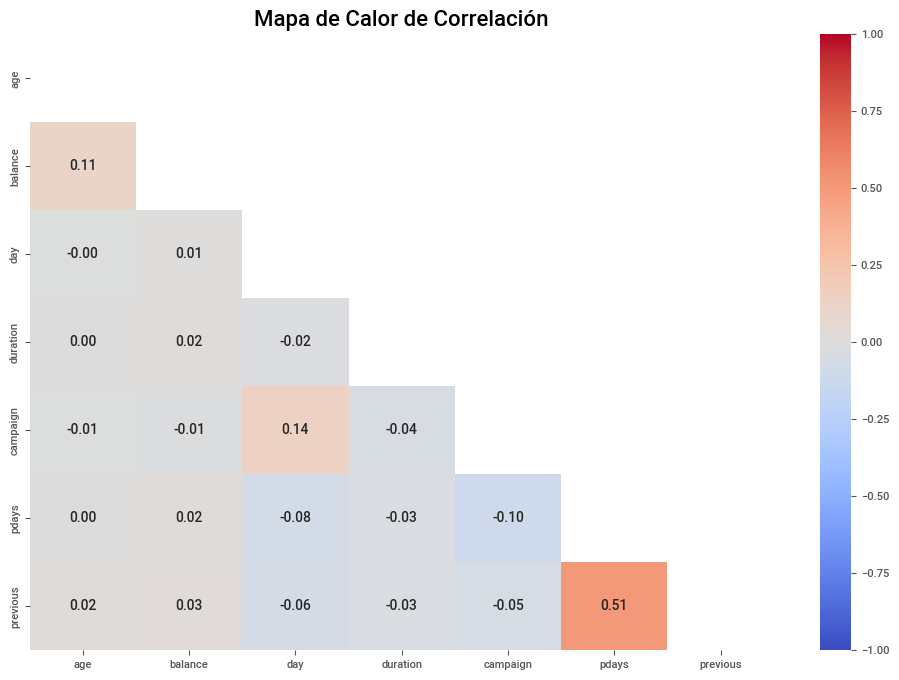

In [27]:
# Calcular la matriz de correlación
correlation_matrix = cont_data.corr()

# Configurar el mapa de calor con una máscara para mostrar solo la mitad superior
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Mapa de Calor de Correlación", fontsize=16)
plt.show()

La correlación débil en general indica que ninguna de las variables numéricas por sí sola es un predictor fuerte de deposit. Esto sugiere que:

- Es posible que el modelo final deba considerar interacciones entre variables y/o usar variables categóricas para capturar mejor el comportamiento de la variable objetivo.
- En el preprocesamiento, será importante explorar transformaciones y técnicas avanzadas para aprovechar estas variables numéricas.

Este análisis preliminar es útil, pero es probable que las características categóricas y combinaciones de variables tengan un impacto mayor en la predicción de deposit.

## 6.2 Visualizar la Distribución de la Variable Objetivo en función de las Variables Categóricas

Para visualizar cómo la variable objetivo (deposit) se distribuye en función de cada variable categórica, se pueden utilizar gráficos de barras o boxplots. Esto permitirá ver si existen patrones en deposit para diferentes categorías (por ejemplo, si algunos trabajos o niveles educativos están más asociados a yes o no).

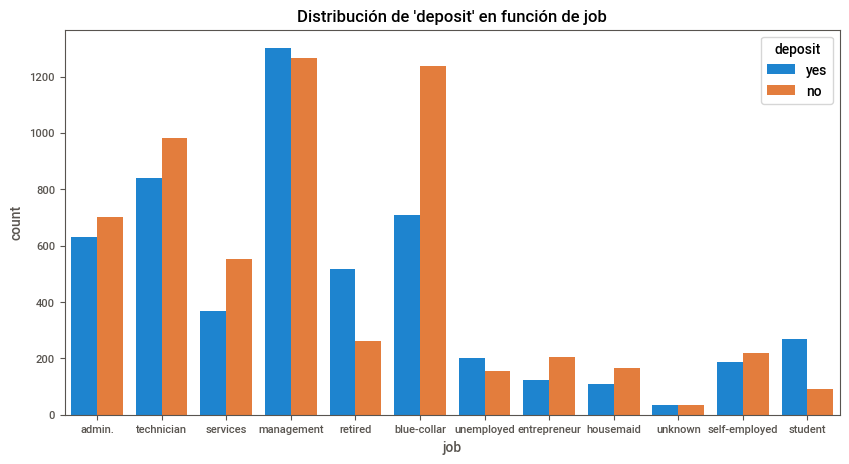

Feature: age                                 |▌         | [  6%]   7:22:56 -> (125:30:00 left)


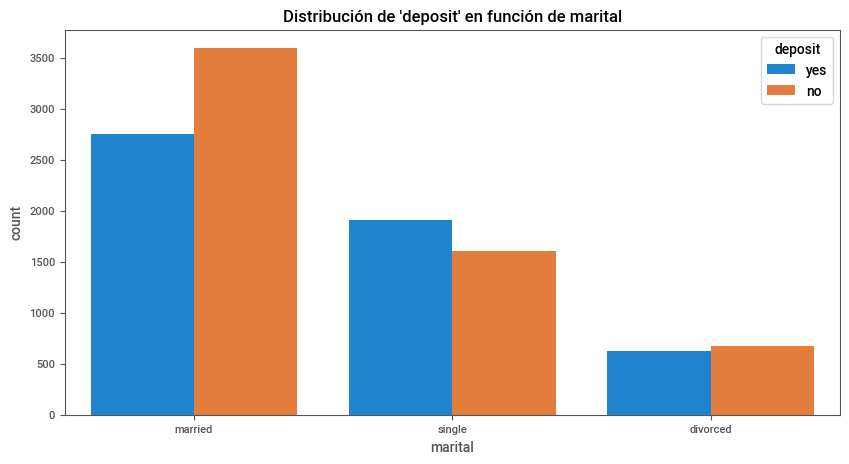

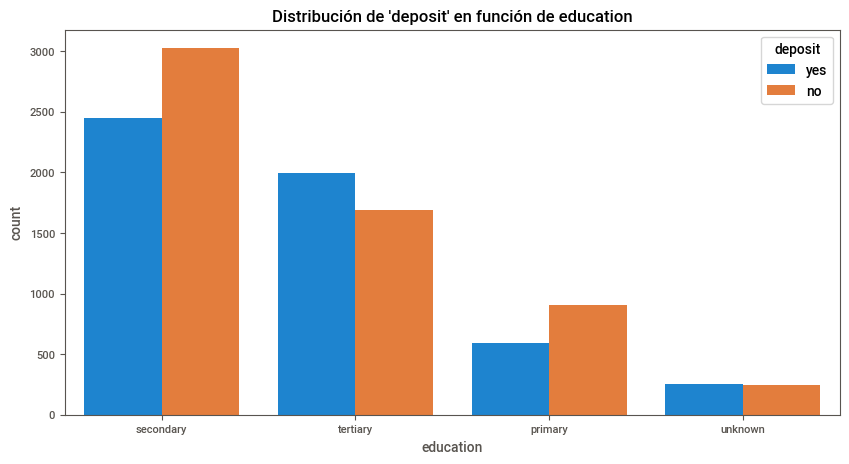

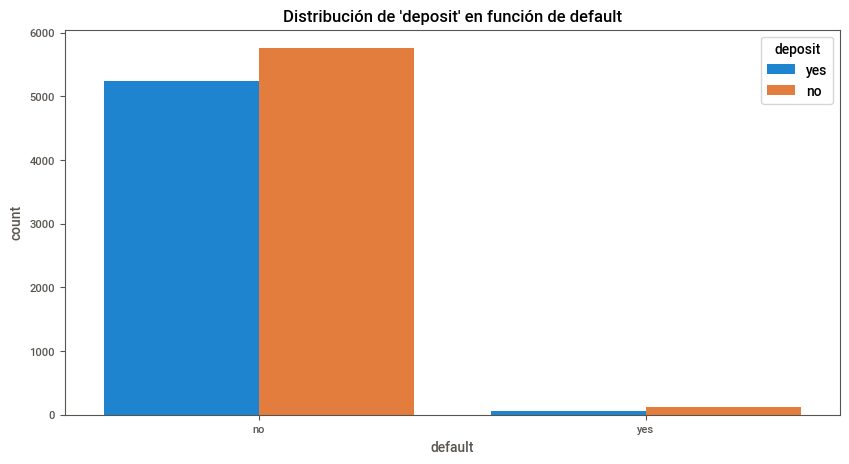

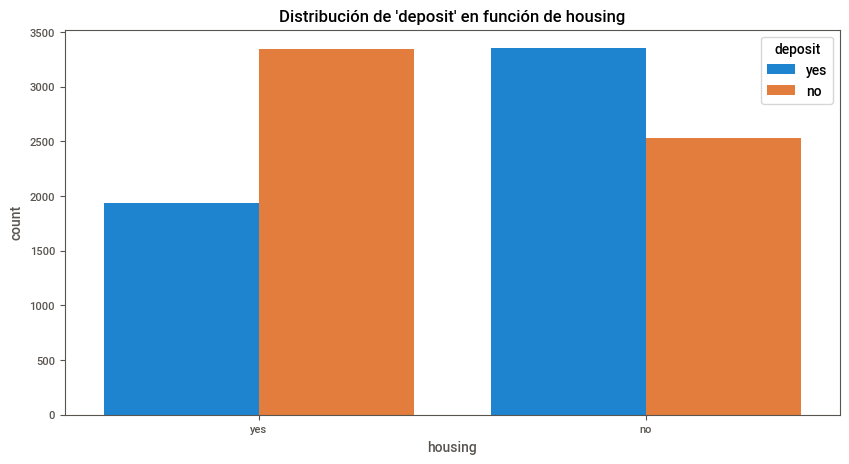

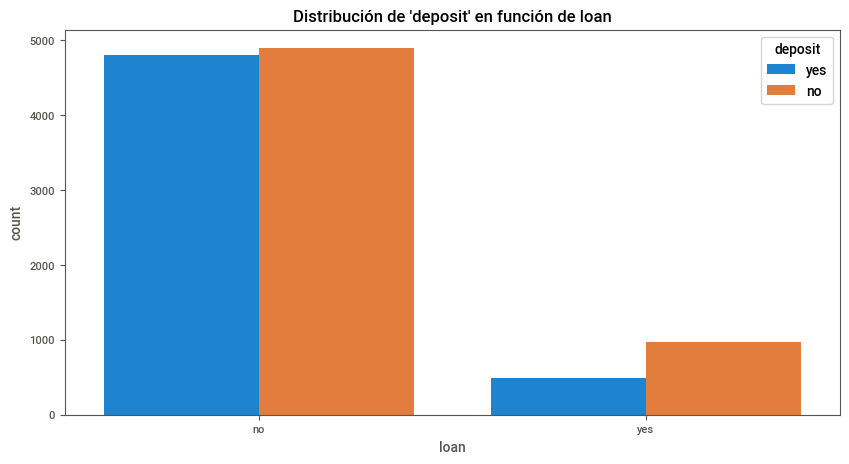

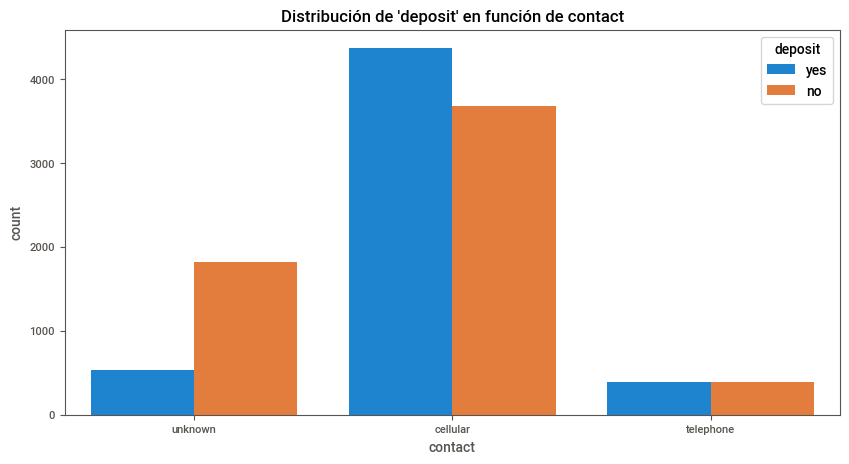

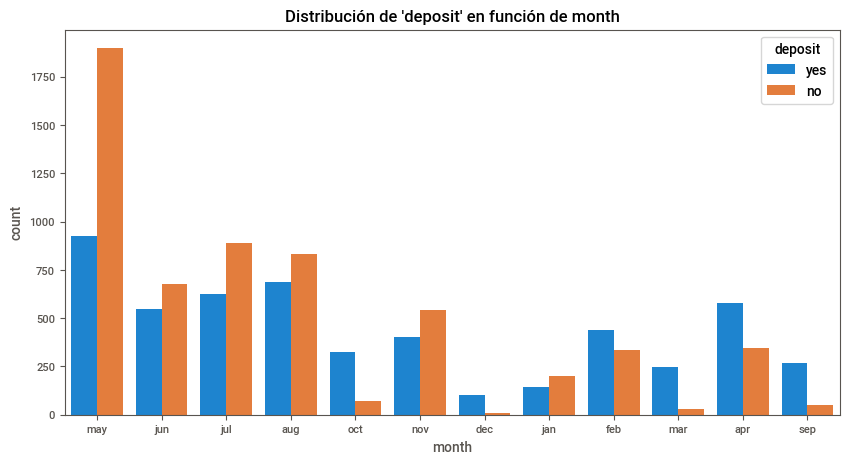

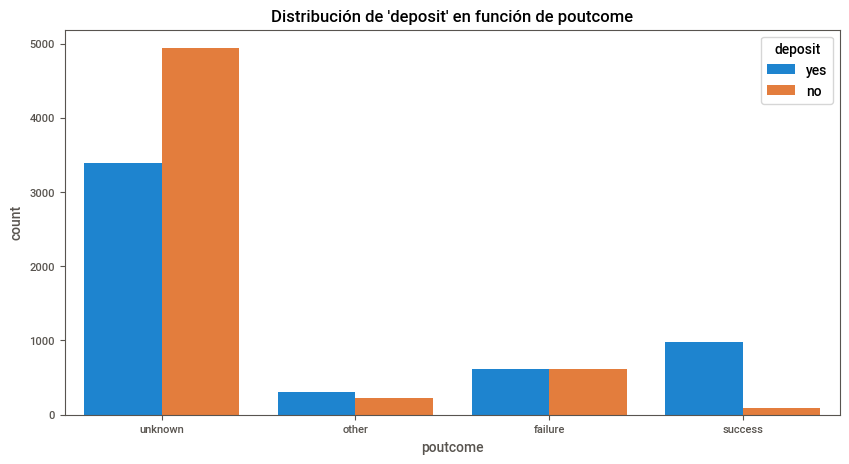

In [28]:
# Variables categóricas
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Crear gráficos de barras para cada variable categórica
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=bank_data, x=var, hue='deposit')
    plt.title(f"Distribución de 'deposit' en función de {var}")
    plt.legend(title='deposit', loc='upper right')
    plt.show()

Las variables categóricas como marital, education, default, housing, loan, month, poutcome, contact, y job muestran patrones interesantes en relación con deposit. Estas variables podrían ser significativas en el modelo, ya que parecen tener una relación con la decisión de suscripción.

## 6.3. Aplicar Pruebas de Chi-cuadrado para Análisis de Asociación entre deposit y Variables Categóricas

La prueba de Chi-cuadrado permite evaluar si existe una asociación significativa entre la variable objetivo deposit y las variables categóricas. Este análisis es útil para determinar si las categorías de variables como job o marital tienen un impacto en deposit.

In [30]:
# Prueba de chi-cuadrado para cada variable categórica
for var in categorical_vars:
    contingency_table = pd.crosstab(bank_data[var], bank_data['deposit'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Variable: {var}")
    print(f"Chi-cuadrado: {chi2}, p-valor: {p}")
    if p < 0.05:
        print(f"Conclusión: Existe una asociación significativa entre '{var}' y 'deposit'.\n")
    else:
        print(f"Conclusión: No hay evidencia de asociación significativa entre '{var}' y 'deposit'.\n")

Variable: job
Chi-cuadrado: 378.0752558664989, p-valor: 2.741689587081072e-74
Conclusión: Existe una asociación significativa entre 'job' y 'deposit'.

Variable: marital
Chi-cuadrado: 108.96197496465444, p-valor: 2.1837743862116184e-24
Conclusión: Existe una asociación significativa entre 'marital' y 'deposit'.

Variable: education
Chi-cuadrado: 122.93484474082007, p-valor: 1.8001380051103543e-26
Conclusión: Existe una asociación significativa entre 'education' y 'deposit'.

Variable: default
Chi-cuadrado: 17.808573693473093, p-valor: 2.4428001791928345e-05
Conclusión: Existe una asociación significativa entre 'default' y 'deposit'.

Variable: housing
Chi-cuadrado: 463.1892407533161, p-valor: 9.724394114495535e-103
Conclusión: Existe una asociación significativa entre 'housing' y 'deposit'.

Variable: loan
Chi-cuadrado: 135.83217051738103, p-valor: 2.171286879630289e-31
Conclusión: Existe una asociación significativa entre 'loan' y 'deposit'.

Variable: contact
Chi-cuadrado: 736.686679

**Observaciones Generales:**

Cada una de las variables categóricas tiene una relación estadísticamente significativa con la decisión de suscribirse (deposit). Esto implica que todas estas variables categóricas son relevantes para el modelo predictivo y deben considerarse en el proceso de modelado.

Este análisis respalda la importancia de incluir y transformar adecuadamente estas variables categóricas en el modelo, ya que proporcionan información valiosa sobre los factores que pueden influir en la suscripción.

# 7. **Detección del Desbalance de Clases:** 

Para revisar el balance entre las clases en la variable objetivo deposit, es importante visualizar y analizar la proporción de cada clase ("yes" y "no") para evaluar si existe un desbalance significativo. Esto permitirá determinar si será necesario aplicar técnicas de re-muestreo, como sobremuestreo (oversampling) de la clase minoritaria, submuestreo (undersampling) de la clase mayoritaria, o técnicas avanzadas como SMOTE.

In [31]:
# Conteo de clases
class_counts = bank_data['deposit'].value_counts()
print(class_counts)

deposit
no     5873
yes    5289
Name: count, dtype: int64


/tmp/ipykernel_71864/1746523034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit', data=bank_data, palette='viridis')


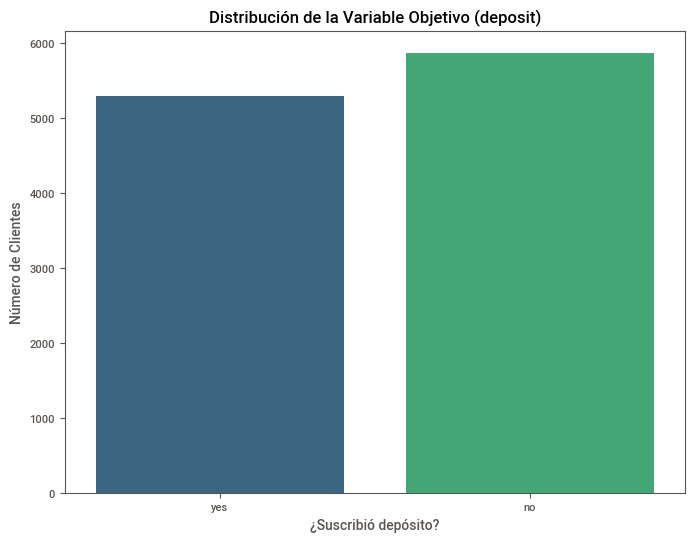

In [32]:
# Visualización del balance de clases
plt.figure(figsize=(8, 6))
sns.countplot(x='deposit', data=bank_data, palette='viridis')
plt.title("Distribución de la Variable Objetivo (deposit)")
plt.xlabel("¿Suscribió depósito?")
plt.ylabel("Número de Clientes")
plt.show()

Al observar la distribución de la variable objetivo deposit, vemos que hay una ligera diferencia entre las clases "yes" y "no". La clase "no" tiene una mayor cantidad de registros (5,873) en comparación con la clase "yes" (5,289). Sin embargo, este desbalance no es excesivamente pronunciado, lo que indica que el modelo podría no tener problemas significativos al entrenarse en esta distribución.

# 8. Gestion de Null, Outliers y desbalance de clases

Dado el análisis previo, los próximos pasos en el pre-procesamiento de los datos para optimizar el rendimiento del modelo son los siguientes:

**Gestión de los Nulls y outliers**

**Imputación de Valores Nulos:**

- Variables Numéricas: Para las variables numéricas como age, se pueden imputar los valores nulos con la mediana, ya que esta es menos sensible a los outliers y representará mejor los valores típicos de la población.

- Variables Categóricas: Para las variables categóricas como marital y education, es posible imputar los valores nulos con la categoría más frecuente (moda) o, en casos específicos, con una categoría como “unknown” para no introducir un sesgo significativo.

**Gestión de Outliers:**

- Winsorización: Aplicar winsorización para las variables con outliers significativos (como balance y duration) para reducir el impacto de estos valores extremos en el modelo sin eliminarlos.

- Transformación Logarítmica o Raíz Cuadrada: Para variables altamente sesgadas, como balance y pdays, aplicar una transformación logarítmica o de raíz cuadrada puede ayudar a normalizar la distribución.

- Mantener Valores Extremos Relevantes: Para algunas variables, los valores extremos pueden aportar información útil, como en el caso de duration para identificar interacciones prolongadas. Estos valores pueden mantenerse si tienen valor predictivo.
Transformaciones para Escalado y Normalización:

**Estandarización o Normalización:** Para las variables numéricas que presentan diferentes escalas (age, balance, duration), aplicar estandarización (media 0 y desviación estándar 1) o normalización (rango entre 0 y 1) será necesario para evitar que algunas variables dominen sobre otras en algoritmos sensibles a la escala. 

**Codificación de Variables Categóricas:** Convertir las variables categóricas seleccionadas (job, marital, education, contact, etc.) en variables dummy utilizando One-Hot Encoding para que el modelo pueda interpretarlas. En el caso de alta cardinalidad, Target Encoding puede considerarse.

# 9. Conclusiones

En función del análisis realizado, se identificaron variables que proporcionan una perspectiva integral del perfil del cliente, considerando aspectos demográficos, situación financiera y el historial de contacto. Estas variables pueden ser usadas para modelar la probabilidad de suscripción a depósitos bancarios.

Dado que la mayoría de las variables numéricas no tienen una fuerte correlación con la variable objetivo (suscripción), se recomienda explorar modelos de clasificación que puedan capturar relaciones no lineales y combinaciones complejas entre variables. Algunos de los modelos más adecuados en este caso serían:

- Regresión Logística: Aunque es un modelo lineal, la Regresión Logística es simple e interpretable, lo cual permite entender cómo cada variable afecta la probabilidad de suscripción. Este modelo es adecuado para problemas de clasificación binaria como el presente, donde la variable objetivo es "yes" o "no".

- Modelos Basados en Árboles de Decisión: Random Forests o Gradient Boosting son modelos de ensamble que permiten capturar relaciones no lineales y complejas entre las variables. Estos modelos no requieren una fuerte correlación entre las variables independientes y la variable objetivo, ya que pueden trabajar con combinaciones de variables de manera efectiva.

Variables Finales Recomendadas para el Modelo:

- **Variables categóricas:** marital, education, default, housing, loan, month, poutcome, contact, job.

- **Variables numéricas:**  age, balance, duration, pdays, campaign, previous.

Estas variables ofrecen un balance entre datos demográficos, financieros y de historial de campañas, lo cual debería mejorar la capacidad predictiva del modelo para la suscripción a depósitos.

En resumen, se sugiere probar la Regresión Logística para un enfoque interpretable y los modelos de Random Forests o Gradient Boosting para capturar relaciones más complejas y potencialmente mejorar el rendimiento predictivo del modelo.

Con respecto al balance de los datos de la variable objetivo, entre las clases "yes" y "no" no es considerablemente alto, sería prudente hacer una revisión del rendimiento inicial del modelo para decidir si es necesario aplicar técnicas de re-muestreo. Esto asegurará que el modelo sea robusto en ambas clases y que no tenga un sesgo hacia la clase mayoritaria.